### Import the following libraries

In [1]:
import time
import numpy as np
import csv
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn import metrics
import sklearn.neighbors
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.manifold import TSNE

### Procedures:

In [2]:
# load feature vectors:
def load_fv(path):
    data = []
    counter = 0
    with open(path) as f:
        for line in f:
	    if counter>0:
                nums = map(lambda x: float(x), line.split(',')[0:])
                data.append(nums)
            counter += 1
    return data 

# load labels corresponding to the feature vectors:
def load_labels(path):
    with open(path) as f:
        labels = [line.rstrip() for line in f]
    labels = labels[1:]
    return labels

#put labels to numeric values ----------------------------------------------
def stringLabelsToNum(labels):
    for i in range(0,len(labels)):
        if labels[i]=="benign":
            labels[i]=int(0)
        if labels[i]=="allaple":
            labels[i]=int(1)
        if labels[i]=="skeeyah":
            labels[i]=int(2)
        if labels[i]=="virlock":
            labels[i]=int(3)
        if labels[i]=="virut":
            labels[i]=int(4)
        if labels[i]=="vundo":
            labels[i]=int(5)
        if labels[i]=="zbot":
            labels[i]=int(6)
    return labels       

### Load data

In [4]:
%%time
X_train = load_fv('X_train.csv')
Y_train = load_labels('y_train.csv')
X_test = load_fv('X_test.csv')
Y_test = load_labels('y_test.csv')

CPU times: user 150 ms, sys: 5.08 ms, total: 155 ms
Wall time: 154 ms


In [5]:
print("Training set: ",np.shape(X_train)) #displays a number of feature vectors and its dimension
print("Testing set: ",np.shape(X_test))
#X_train[0] 
#Y_train[1:15] # there are 7 classes: "benign","allaple", "skeeyah","virlock","virut","vundo","zbot"

('Training set: ', (9380, 25))
('Testing set: ', (4620, 25))


In [6]:
# put labels to numeric values (because some of ML algorithms need that)
Y_train = stringLabelsToNum(Y_train)
Y_test = stringLabelsToNum(Y_test) 

### Data normalization

In [55]:
%%time
# data_norm = preprocessing.normalize(X_train, norm='l2')  #our data are already normalized
# data_norm[1]

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 7.87 µs


### k-nearest neighbors classifier

In [7]:
%%time
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 3,n_jobs=-1)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
confusion_matrix=sklearn.metrics.confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)
err=1-sklearn.metrics.accuracy_score(Y_test, Y_pred)
print('')
print('ERR = %.4f' % err)
print('')
print('--------------------------------------')
print('')
print(metrics.classification_report(Y_test, Y_pred,digits=4))
print('')
print('--------------------------------------')
print('')

[[607   0   0   2   8  10  33]
 [  3 667   1   0   7   0   2]
 [  5   0 656   0   0   3   1]
 [  1   0   0 655   1   1   0]
 [ 17   5   0   0 643   3   4]
 [  6   2   0   0   0 633  13]
 [ 32   7   2   1   8  13 568]]

ERR = 0.0413

--------------------------------------

              precision    recall  f1-score   support

           0     0.9046    0.9197    0.9121       660
           1     0.9794    0.9809    0.9802       680
           2     0.9954    0.9865    0.9909       665
           3     0.9954    0.9954    0.9954       658
           4     0.9640    0.9568    0.9604       672
           5     0.9548    0.9679    0.9613       654
           6     0.9147    0.9002    0.9073       631

   micro avg     0.9587    0.9587    0.9587      4620
   macro avg     0.9583    0.9582    0.9582      4620
weighted avg     0.9587    0.9587    0.9587      4620


--------------------------------------

CPU times: user 1.1 s, sys: 0 ns, total: 1.1 s
Wall time: 455 ms


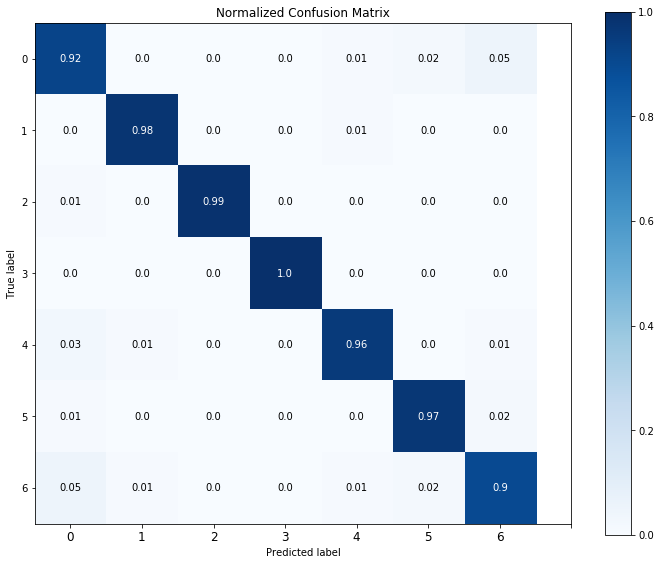

In [8]:
np.set_printoptions(precision=3)
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, figsize=(10,8), normalize=True)
plt.xticks(np.arange(0, 8, step=1),fontsize=12)

plt.tight_layout()
#plt.savefig('confMatrixForAllFamilies.eps',format='eps')
plt.show()

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.96 µs


Text(0,0.5,'Testing accuracy')

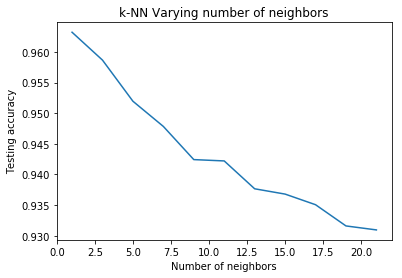

In [9]:
%time
k_list=[1,3,5,7,9,11,13,15,17,19,21]
acc_list = []
for k in k_list:
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = k,n_jobs=-1)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    acc_list.append(sklearn.metrics.accuracy_score(Y_test, Y_pred))


#plot the relationship between k and the testing accuracy
plt.title('k-NN Varying number of neighbors')
plt.plot(k_list,acc_list)
plt.xlabel('Number of neighbors')
plt.ylabel('Testing accuracy')    

### Naive Bayes (Gaussian) :

In [10]:
%%time
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
confusion_matrix=sklearn.metrics.confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)
err=1-sklearn.metrics.accuracy_score(Y_test, Y_pred)
print('ERR = %.4f' % err)
print('')
print('--------------------------------------')
print('')
print(metrics.classification_report(Y_test, Y_pred,digits=4))

[[476   2   6   0  23  85  68]
 [  5 625   1   0  15  32   2]
 [ 11   0 506   0   0 147   1]
 [  1   0   8 639   4   5   1]
 [ 10  17  24   0 601  16   4]
 [  5  13   0   0   2 627   7]
 [ 39   1  29   2  10 244 306]]
ERR = 0.1818

--------------------------------------

              precision    recall  f1-score   support

           0     0.8702    0.7212    0.7887       660
           1     0.9498    0.9191    0.9342       680
           2     0.8815    0.7609    0.8168       665
           3     0.9969    0.9711    0.9838       658
           4     0.9176    0.8943    0.9058       672
           5     0.5424    0.9587    0.6928       654
           6     0.7866    0.4849    0.6000       631

   micro avg     0.8182    0.8182    0.8182      4620
   macro avg     0.8493    0.8158    0.8175      4620
weighted avg     0.8507    0.8182    0.8196      4620

CPU times: user 58.2 ms, sys: 206 µs, total: 58.4 ms
Wall time: 56.4 ms


### Decision tree:

In [11]:
%%time
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
confusion_matrix=sklearn.metrics.confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)
err=1-sklearn.metrics.accuracy_score(Y_test, Y_pred)
print('ERR = %.4f' % err)
print('')
print('--------------------------------------')
print('')
print(metrics.classification_report(Y_test, Y_pred,digits=4))

[[590   7   5   2  10  15  31]
 [  5 662   1   0   9   1   2]
 [  3   0 658   0   0   1   3]
 [  1   0   1 654   0   1   1]
 [ 17   1   1   1 639   5   8]
 [  6   1   1   0   1 636   9]
 [ 39   6   2   0   8  16 560]]
ERR = 0.0478

--------------------------------------

              precision    recall  f1-score   support

           0     0.8926    0.8939    0.8933       660
           1     0.9778    0.9735    0.9757       680
           2     0.9836    0.9895    0.9865       665
           3     0.9954    0.9939    0.9947       658
           4     0.9580    0.9509    0.9544       672
           5     0.9422    0.9725    0.9571       654
           6     0.9121    0.8875    0.8996       631

   micro avg     0.9522    0.9522    0.9522      4620
   macro avg     0.9517    0.9517    0.9516      4620
weighted avg     0.9521    0.9522    0.9521      4620

CPU times: user 181 ms, sys: 0 ns, total: 181 ms
Wall time: 178 ms


### Deep neural network:

In [17]:
%%time
from sklearn.neural_network import MLPClassifier
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(400, 200, 2), random_state=1)
#clf = MLPClassifier(hidden_layer_sizes=(200,100,2), max_iter=300,activation = 'relu',solver='adam',random_state=1)
clf = MLPClassifier(hidden_layer_sizes=(200,100), max_iter=300,activation = 'relu',solver='adam',random_state=1)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
confusion_matrix=sklearn.metrics.confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)
err=1-sklearn.metrics.accuracy_score(Y_test, Y_pred)
print('ERR = %.4f' % err)
print('')
print('--------------------------------------')
print('')
print(metrics.classification_report(Y_test, Y_pred,digits=4))

[[618   2   3   1   5   8  23]
 [  2 664   0   0   6   1   7]
 [  6   0 656   0   0   2   1]
 [  2   0   0 654   0   1   1]
 [ 10   2   0   0 652   4   4]
 [  7   1   0   0   2 636   8]
 [ 35   1   0   2   8   7 578]]
ERR = 0.0351

--------------------------------------

              precision    recall  f1-score   support

           0     0.9088    0.9364    0.9224       660
           1     0.9910    0.9765    0.9837       680
           2     0.9954    0.9865    0.9909       665
           3     0.9954    0.9939    0.9947       658
           4     0.9688    0.9702    0.9695       672
           5     0.9651    0.9725    0.9688       654
           6     0.9293    0.9160    0.9226       631

   micro avg     0.9649    0.9649    0.9649      4620
   macro avg     0.9648    0.9646    0.9647      4620
weighted avg     0.9652    0.9649    0.9650      4620

CPU times: user 3min 52s, sys: 3min 1s, total: 6min 53s
Wall time: 52.3 s


### Graphical representation

In [12]:
def plot_tsne(X, y, colormap=plt.cm.Paired):
    plt.figure(figsize=(8, 6))

    # clean the figure
    plt.clf()

    tsne = TSNE()
    X_embedded = tsne.fit_transform(X)
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap=colormap)
    
    plt.xticks(())
    plt.yticks(())

    plt.show()

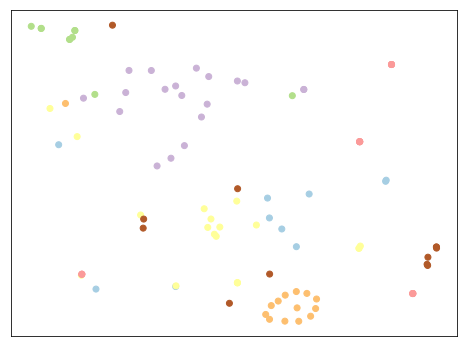

CPU times: user 534 ms, sys: 67.7 ms, total: 602 ms
Wall time: 459 ms


In [16]:
%%time
plot_tsne(X_train[:100], Y_train[:100])